In [ ]:
!pip install ultralytics

In [ ]:
%cd /opt/app-root/src/
!yolo predict model=yolov8n.pt source=datasets/training/valid/images

In [ ]:
%cd /opt/app-root/src/
!yolo train model=yolov8n.pt batch=2 epochs=100 data=flyingthings.yaml exist_ok=True

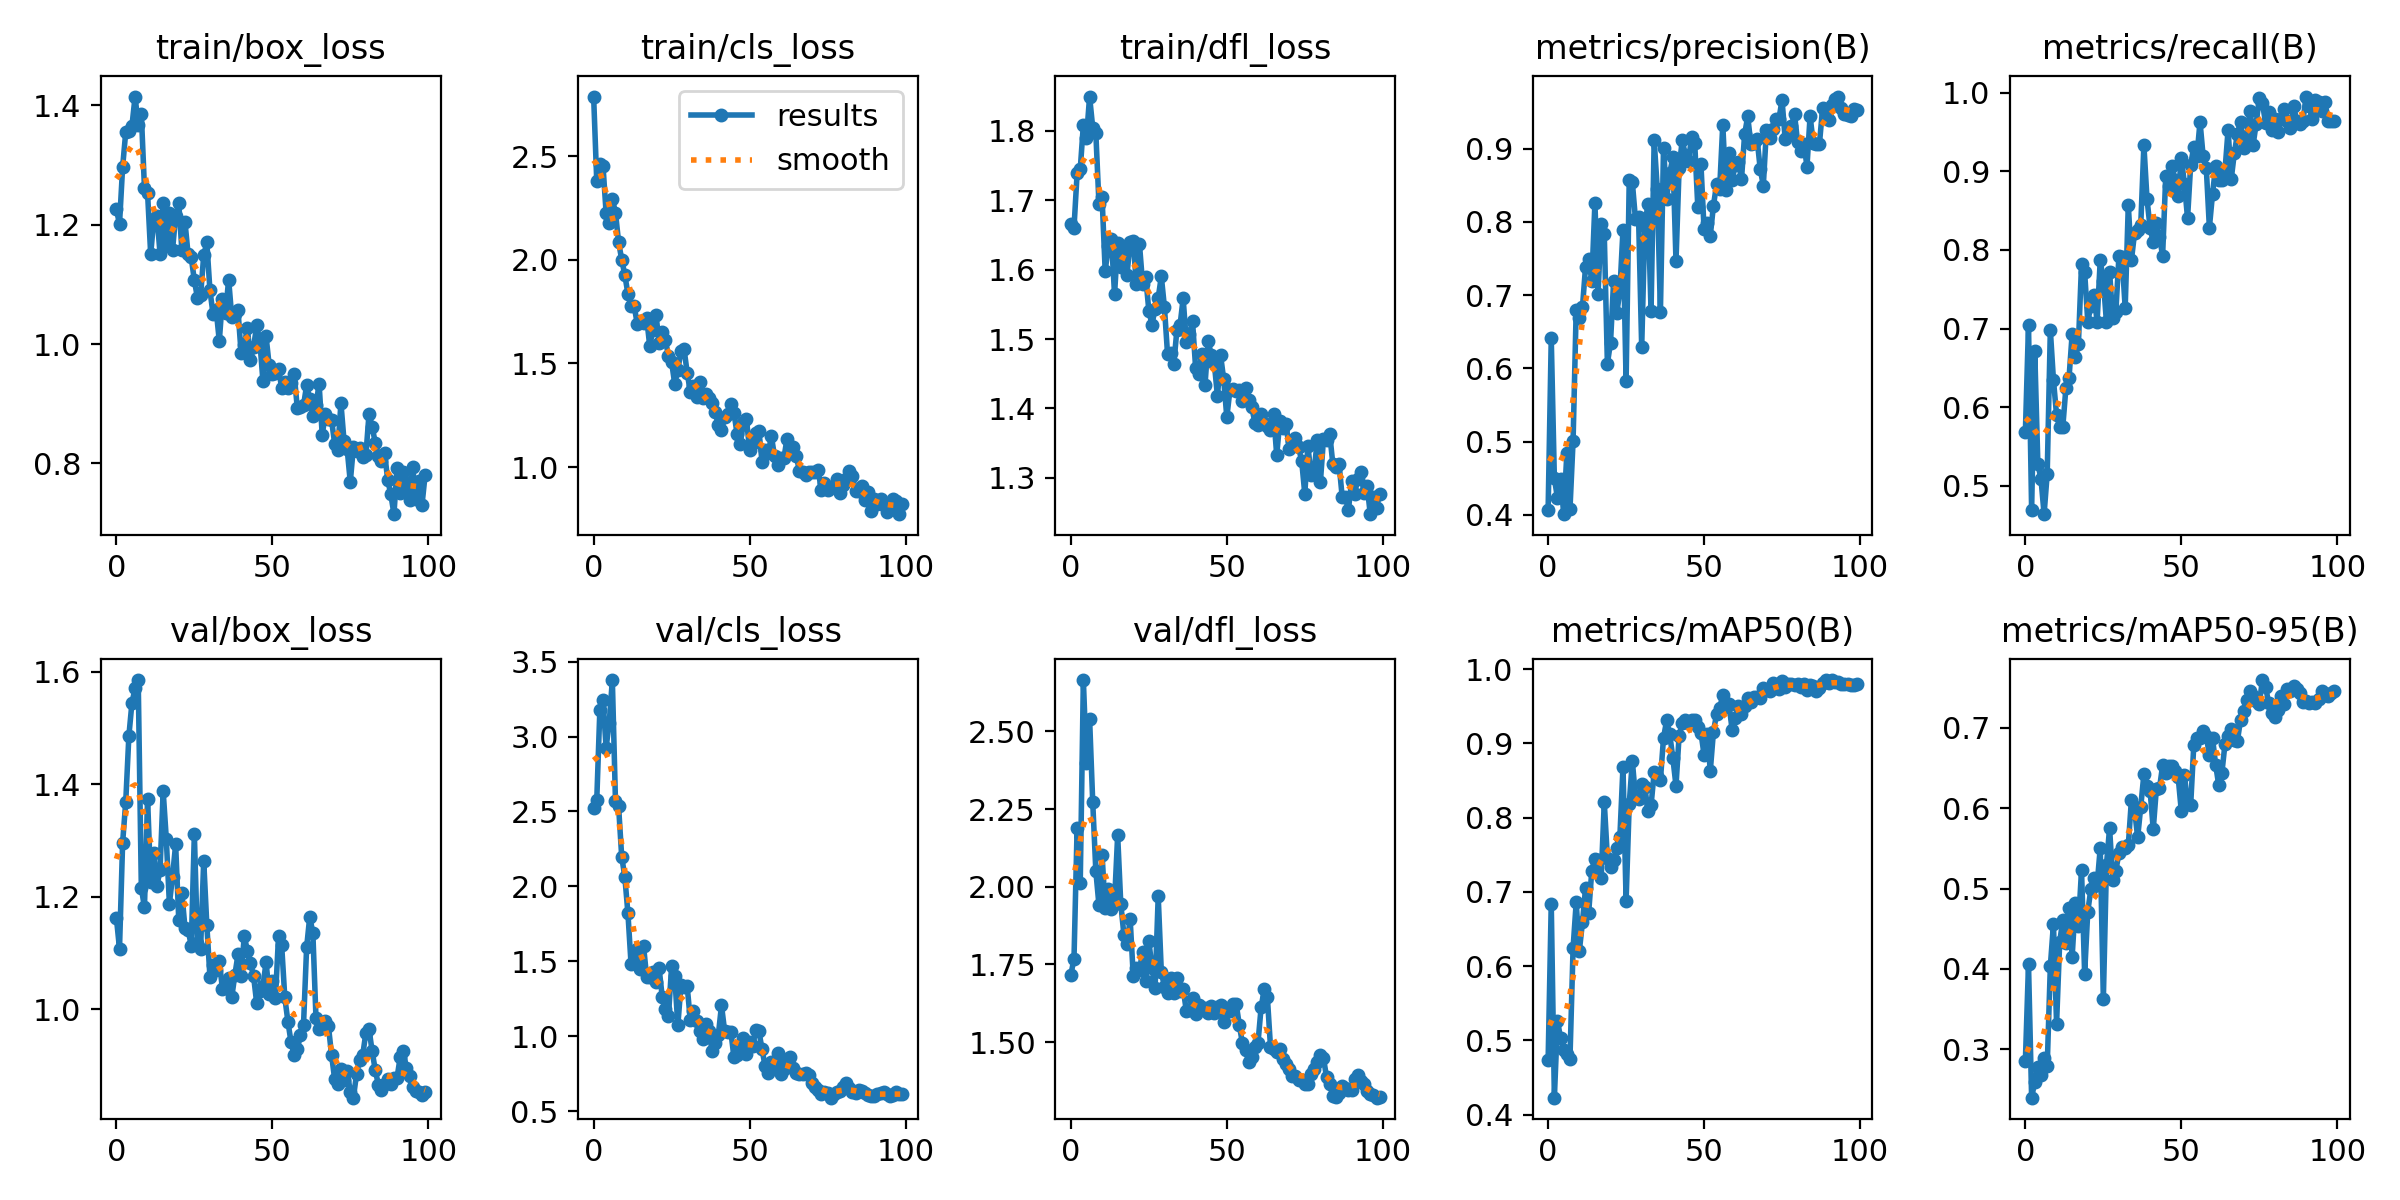

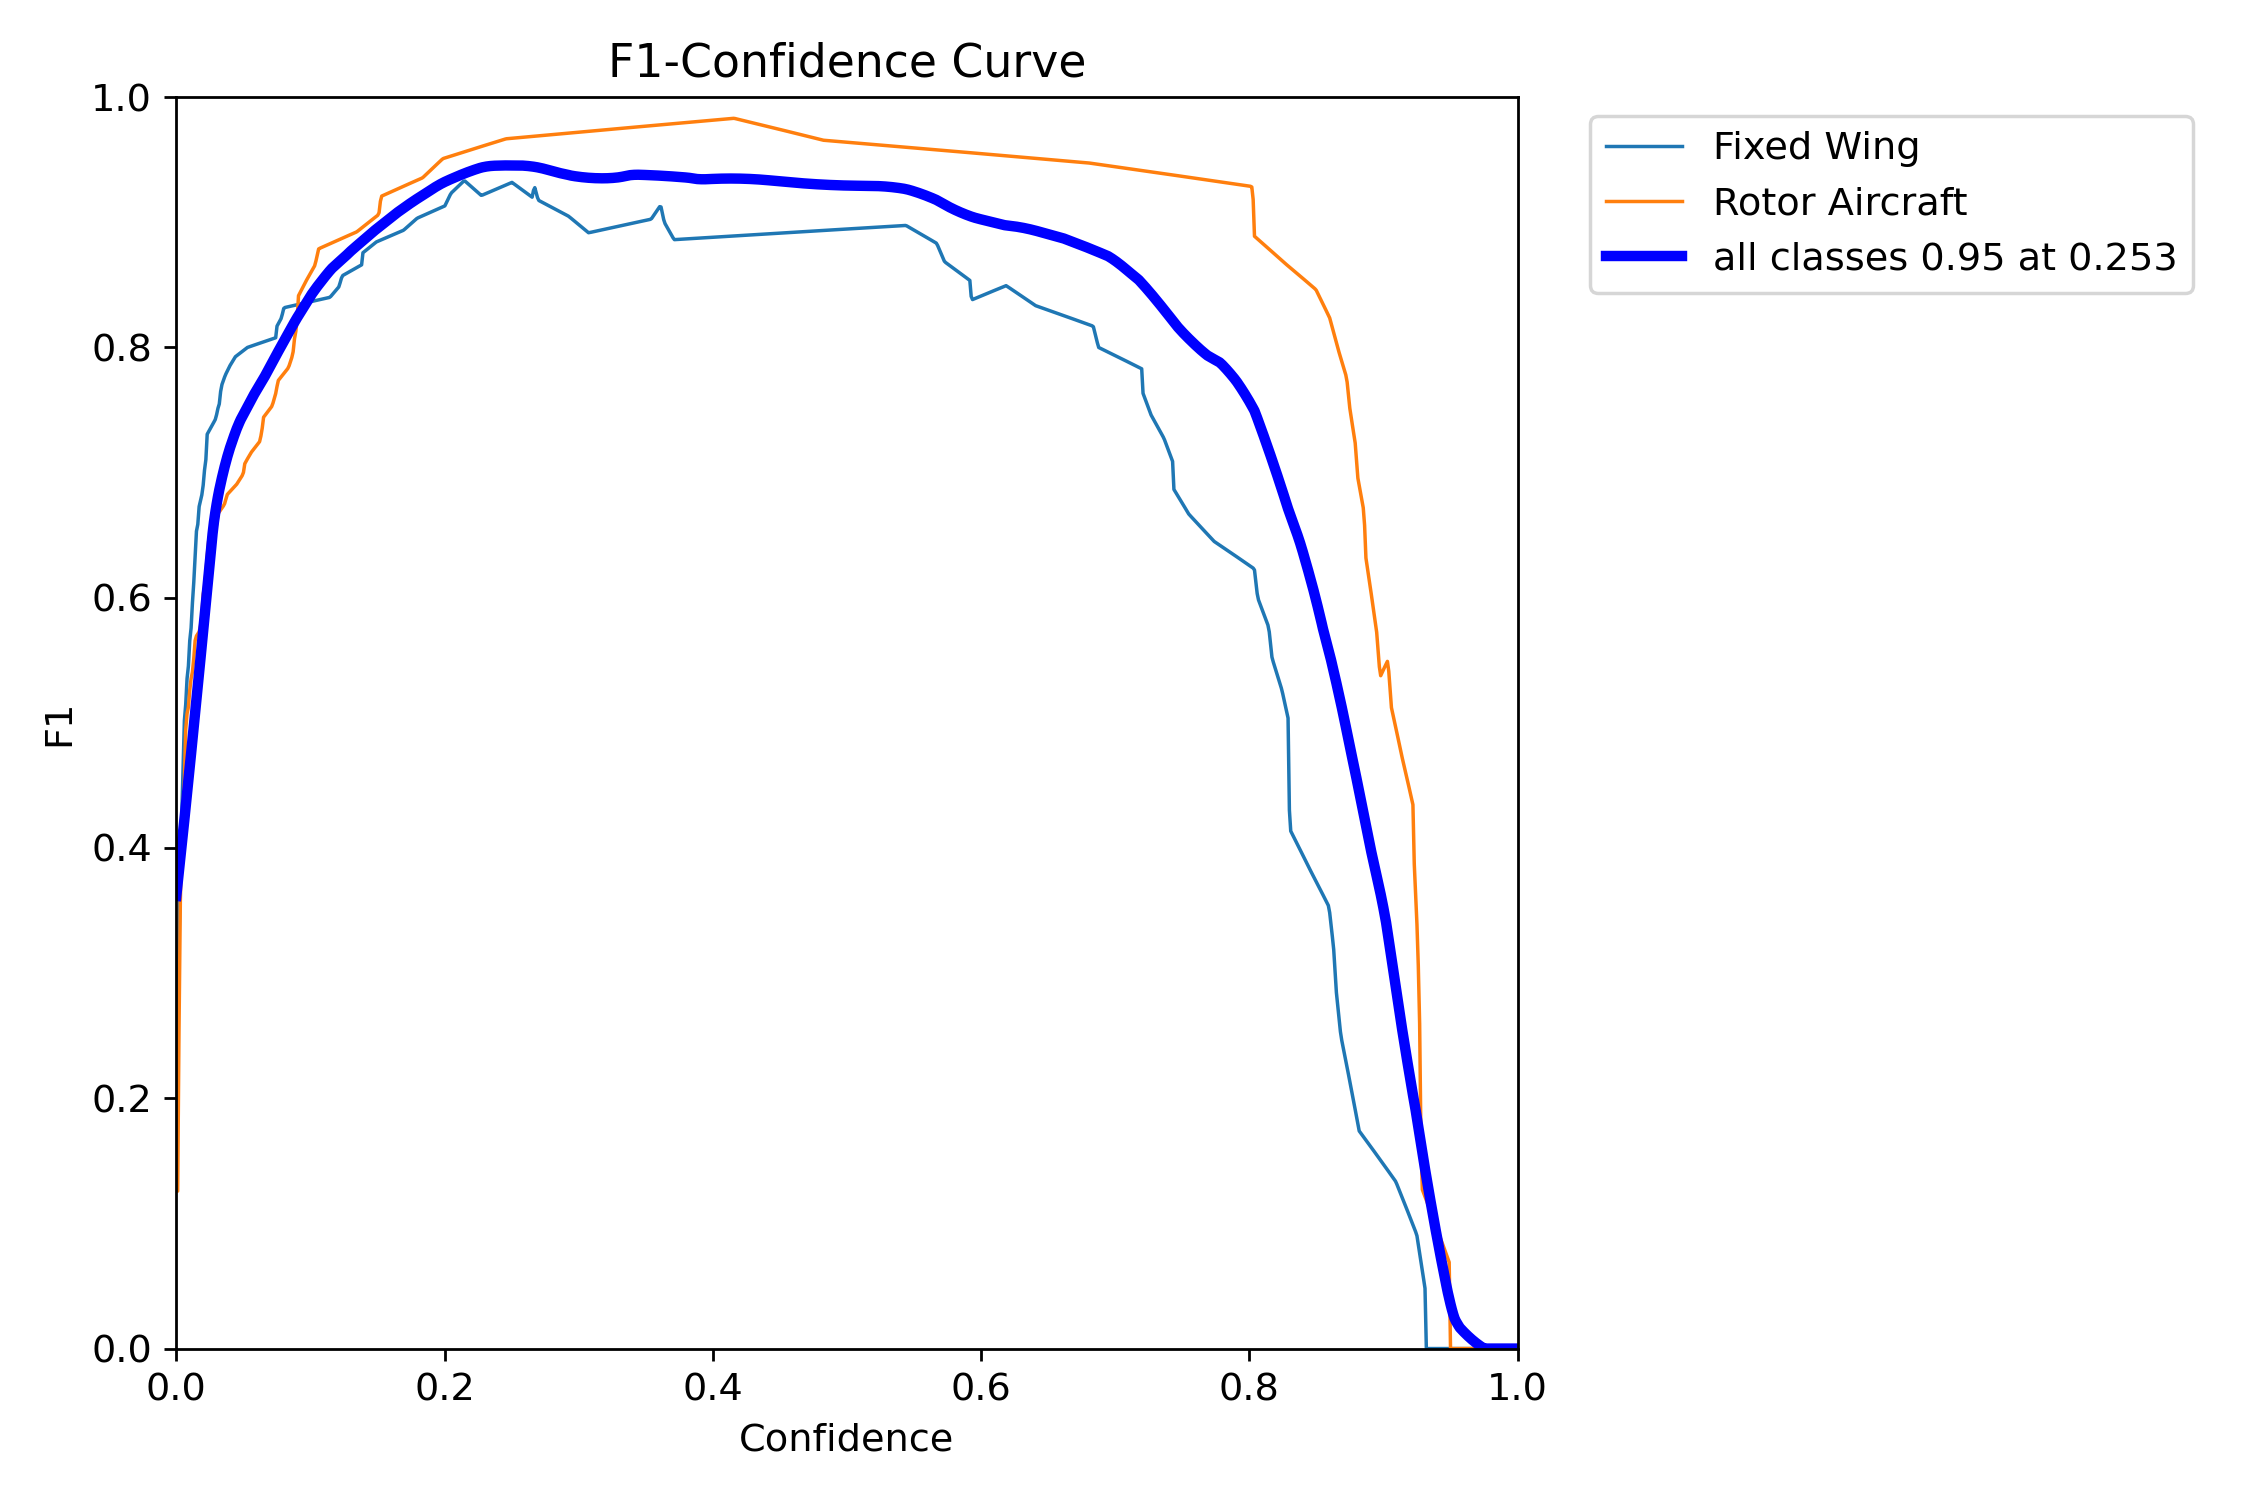

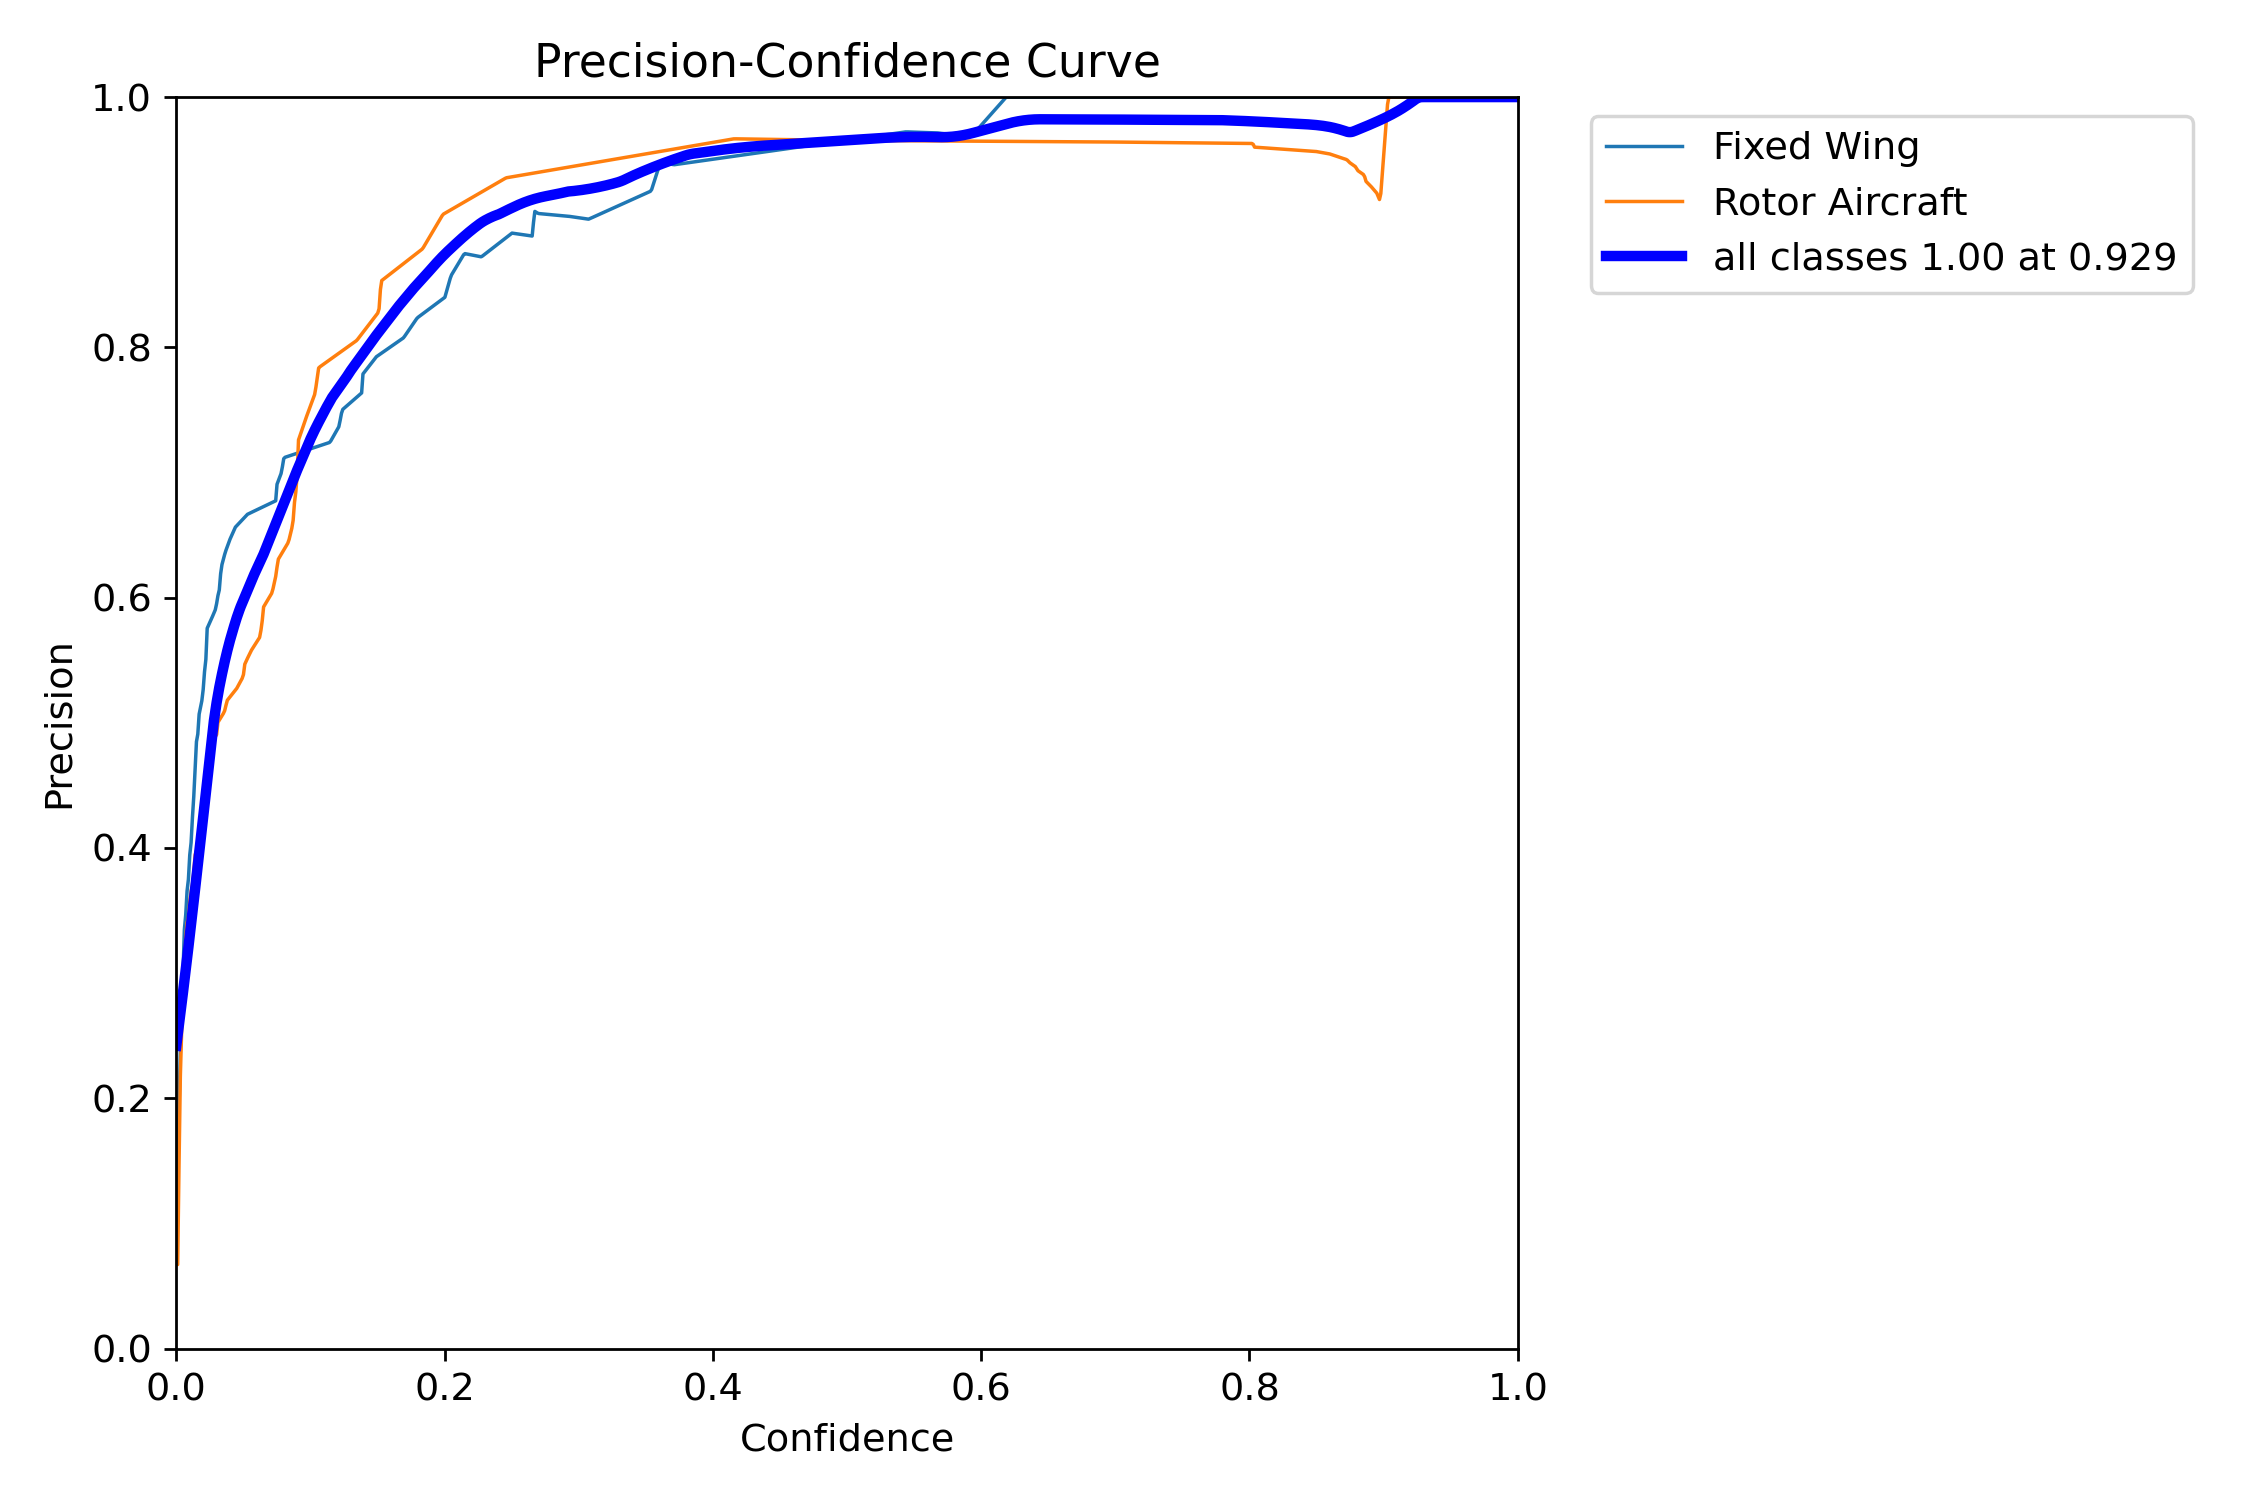

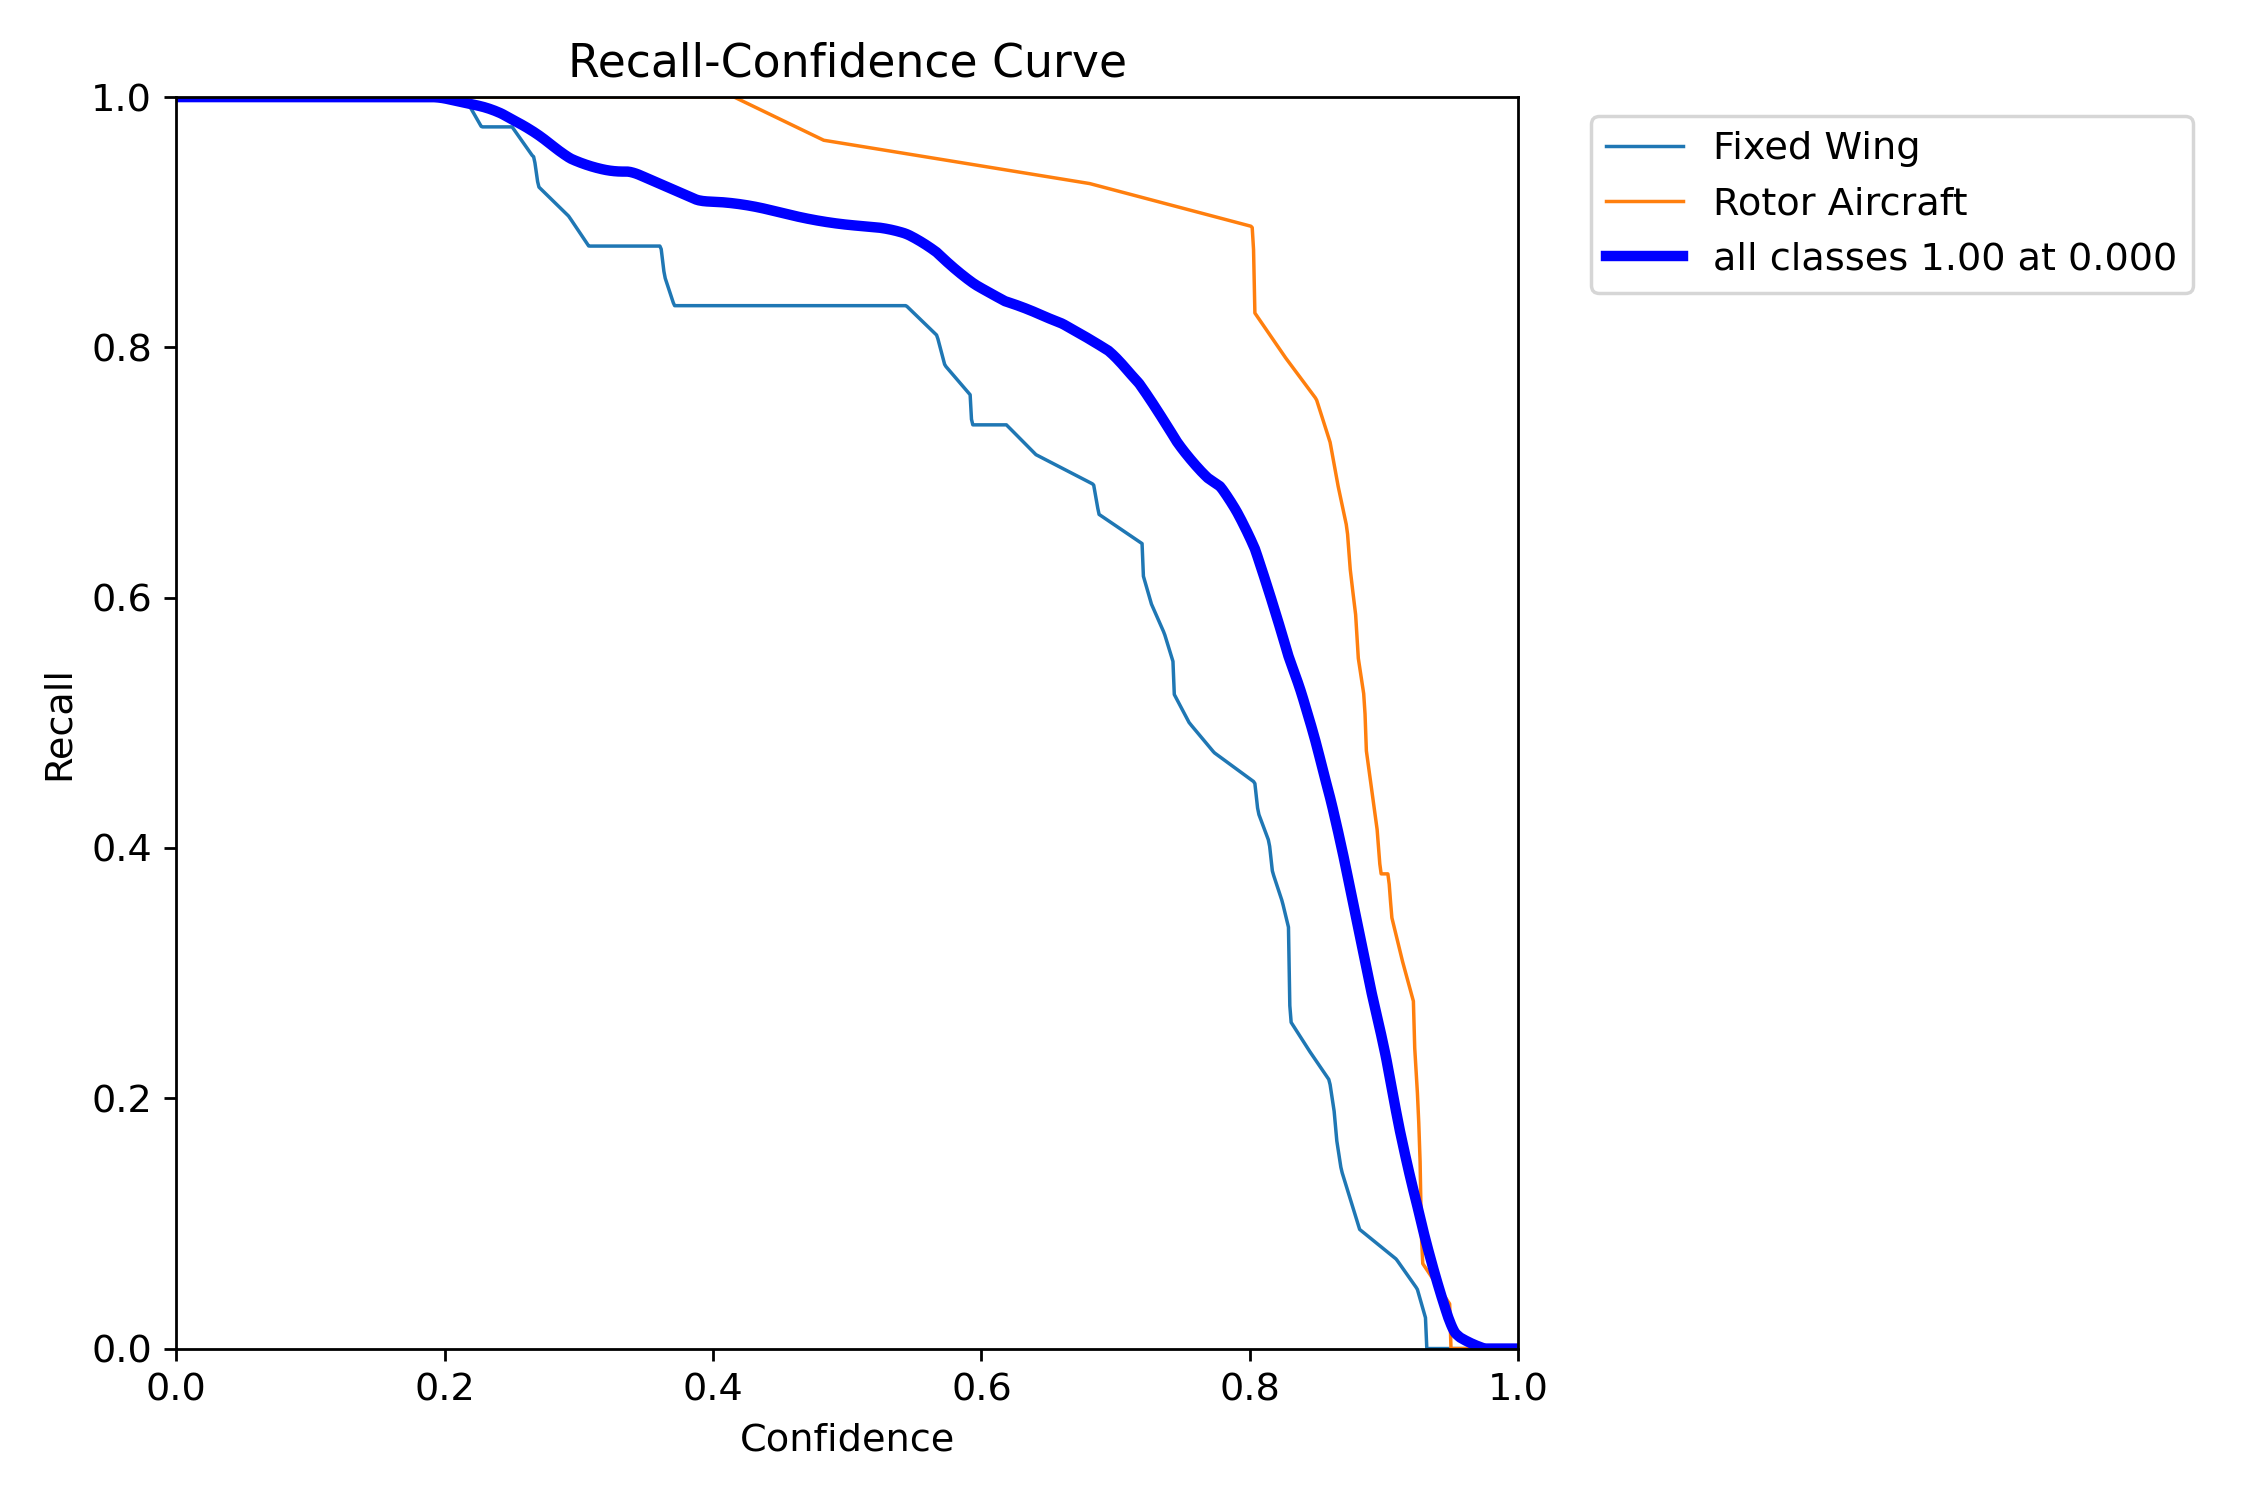

In [12]:
from PIL import Image
import IPython.display as display

# Set the paths to the image files
image_paths = [
    'runs/detect/train/results.png',
    'runs/detect/train/F1_curve.png',
    'runs/detect/train/P_curve.png',
    'runs/detect/train/R_curve.png'
]

# Create a list to hold the Image objects
images = []

# Open the images and append them to the list
for path in image_paths:
    image = Image.open(path)
    images.append(image)

# Display the images
for image in images:
    display.display(image)

In [ ]:
%cd /opt/app-root/src/
!yolo predict model=runs/detect/train/weights/best.pt source=datasets/training/valid/images

In [ ]:
import os
import minio
import urllib3

# Disable SSL certificate verification
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

# Set up MinIO client with insecure HTTPS
endpoint_str = os.environ.get('AWS_S3_ENDPOINT')
minio_endpoint = endpoint_str.lstrip('https://')
access_key = os.environ.get('AWS_ACCESS_KEY_ID')
secret_key = os.environ.get('AWS_SECRET_ACCESS_KEY')
minio_client = minio.Minio(
    endpoint=minio_endpoint,
    access_key=access_key,
    secret_key=secret_key,
    secure=True,
    http_client=urllib3.PoolManager(cert_reqs='CERT_NONE', assert_hostname=False)
)


# Set the bucket name and file path
bucket_name = os.environ.get('AWS_S3_BUCKET')
file_path = 'runs/detect/train/weights/best.pt'

# Set the object name (the name under which the file will be stored in the bucket)
object_name = 'flyingthings.pt'

# Upload the file
minio_client.fput_object(bucket_name, object_name, file_path)

print(f"The file '{object_name}' has been uploaded to the '{bucket_name}' bucket.")
